## Tutorial for recording a guitar string stroke and detecting its pitch

I use the python library called sounddevice which allows to easily record audio and represent the result as a numpy array.

We will use two different methods for detecting the pitch and compare their results.

For reference, here is the list of frequencies of all 6 strings expected for a well tuned guitar:


String	| Frequency	| Scientific pitch notation
--- | --- | ---
1 (E) | 329.63 Hz | E4
2 (B) |	246.94 Hz | B3
3 (G) |	196.00 Hz |	G3
4 (D) |	146.83 Hz |	D3
5 (A) | 110.00 Hz | A2
6 (E) | 82.41 Hz | E2


In [79]:
import sounddevice as sd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### First of all, check the list of available audio devices on the system

I use an external USB sound card called Sound Blaster E1: this is the one we will use here

In [3]:
sd.query_devices()

  0 Sound Blaster E1: USB Audio (hw:0,0), ALSA (1 in, 2 out)
  1 bcm2835 ALSA: - (hw:1,0), ALSA (0 in, 2 out)
  2 bcm2835 ALSA: IEC958/HDMI (hw:1,1), ALSA (0 in, 2 out)
  3 sysdefault, ALSA (128 in, 128 out)
  4 front, ALSA (0 in, 2 out)
  5 surround40, ALSA (0 in, 2 out)
  6 iec958, ALSA (0 in, 2 out)
  7 spdif, ALSA (1 in, 2 out)
  8 dmix, ALSA (0 in, 2 out)
* 9 default, ALSA (128 in, 128 out)

#### We define the length we want to record in seconds and the sampling rate to 44100 Hz

In [71]:
device = 0    # we use my USB sound card device
duration = 2  # seconds
fs = 44100    # samples by second

#### We can now record 2 seconds worth of audio

For this tutorial, I have played the D string of my guitar.

The result is a numpy array we store in the `myrecording` variable

In [72]:
myrecording = sd.rec(duration * fs, samplerate=fs, channels=1, device=0)

#### Let's plot a section of this array to look at it first

We notice a pretty periodic signal with a clear fundamental frequency: which makes sense since a guitar string vibrates producing an almost purely sinuzoidal wave

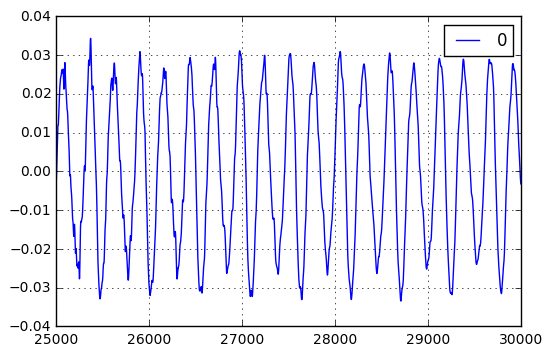

In [80]:
df = pd.DataFrame(myrecording)
df.loc[25000:30000].plot()

### Pitch detection using Fat Fourier Transform

#### We use numpy to compute the discrete Fourier transform of the signal:

In [39]:
fourier = np.fft.fft(rec)

We can visualise a section of the Fourier transform to notice there is a clear fundamental frequency:

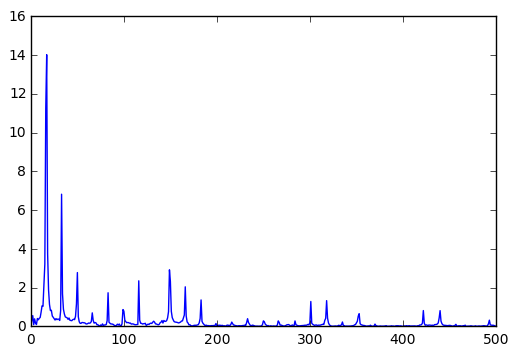

In [88]:
plt.plot(abs(fourier[:len(fourier)/10]))

#### We find the frequency corresponding to the maximum of this Fourier transform, and calculate the corresponding real frequency by re-multiplying by the sampling rate

In [89]:
f_max_index = np.argmax(abs(fourier[:fourier.size/2]))
freqs = np.fft.fftfreq(len(fourier))
freqs[f_max_index]*fs

149.94

#### This methid has detected that my guitar string stroke has fundamental frequency of 149.94 Hz, which is indeed very close to the expected frequency of the D string of a well tuned guitar (target if 146.83 Hz)

My guitar was not very well tuned: this indicates I should slightly tune down my 4th string

-------

### Using Autocorrelation method for pitch detection

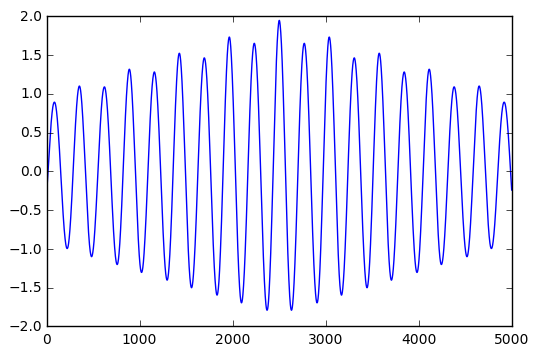

In [90]:
rec = myrecording.ravel()
rec = rec[25000:30000]
autocorr = np.correlate(rec, rec, mode='same')
plt.plot(autocorr)